# Logistic Regression from Scratch

Logistic regression is a classification method used when the target variable has two possible outcomes. It predicts the probability of the sample belonging to each class.

Pros: simple, fast, gives probabilities

Cons: Linear decision boundary

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [32]:
np.random.seed(0)

# Class 0: centered around (2, 2)
X0 = np.random.randn(50, 2) + np.array([2, 2])
y0 = np.zeros(50)

# Class 1: centered around (4, 4)
X1 = np.random.randn(50, 2) + np.array([4, 4])
y1 = np.ones(50)

# Combine them
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


Logistic regression uses the sigmoid function $\sigma(z)=\frac{1}{1+e^{-z}}$ where the input $z=w^Tx+b$ (like linear regression). The sigmoid function outputs values in range $[0, 1]$. These are the probabilites.

The loss function is Binary Cross-Entropy loss: $BCE=-\frac{1}{n}\sum_{k=1}^K y_k \log(p_k)+(1-y_k)\log(1-p_k)$,

where $y_k$ is the real class of the $k$:th sample (0 or 1) and $p_k$ is the prediction of the class (probability)

Let's define these helper functions:

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def BCE_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

We use gradient descent to find the minimum of the loss function:

$\nabla_w L=\frac{1}{n}X^T(\hat{y}-y)$

$\nabla_b L=\frac{1}{n}\sum_i(\hat{y}_i-y_i)$

In [38]:
def train_logistic_regression(X, y, lr=1.0, n_iter=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    losses = []

    for i in range(n_iter):
        
        # Linear combination
        z = X @ w + b

        # Apply sigmoid to get probabilities
        y_pred = sigmoid(z)

        # Compute gradients
        dw = (X.T @ (y_pred - y)) / n_samples
        db = np.mean(y_pred - y)

        # Gradient descent step
        w -= lr * dw
        b -= lr * db

        # Track loss for visualization
        loss = BCE_loss(y, y_pred)
        losses.append(loss)

        if i % 200 == 0:
            print(f"Iteration {i}: loss = {loss:.4f}")

    return w, b, losses

Iteration 0: loss = 0.6931
Iteration 200: loss = 0.2387
Iteration 400: loss = 0.2231
Iteration 600: loss = 0.2178
Iteration 800: loss = 0.2155
Iteration 1000: loss = 0.2144
Iteration 1200: loss = 0.2138
Iteration 1400: loss = 0.2134
Iteration 1600: loss = 0.2132
Iteration 1800: loss = 0.2131


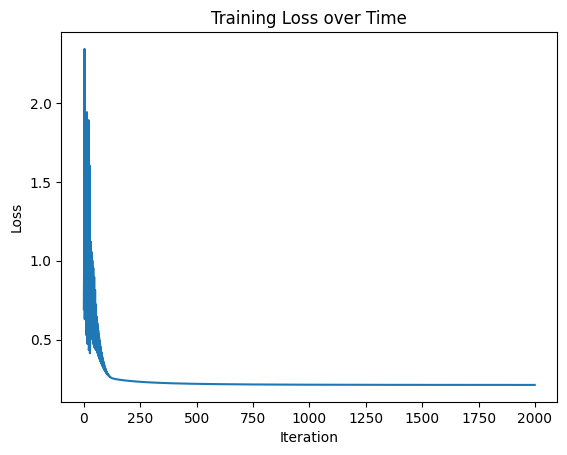

In [39]:
# Train model
w, b, losses = train_logistic_regression(X_train, y_train, lr=0.8, n_iter=2000)

# Plot training loss
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.show()

In [34]:
# Evaluate on test data
z_pred = X_test @ w + b
y_pred_prob = sigmoid(z_pred)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)

Test accuracy: 1.0


### Visualizing the decision boundary

I still want to visualize the decision boundary (the line on which the probability crosses 0.5)

In [40]:
def plot_decision_boundary(X_train, y_train, X_test, y_test, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = sigmoid(w[0] * xx + w[1] * yy + b)
    Z = Z > 0.5

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', label="Train Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='^', s=50, label="Test Data")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Logistic Regression Decision Boundary")
    plt.legend()
    plt.show()

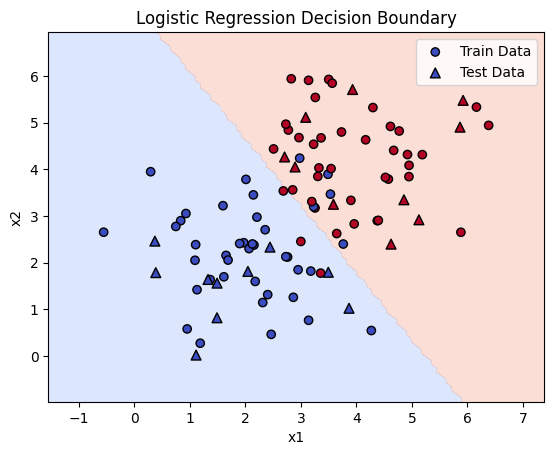

In [41]:
plot_decision_boundary(X_train, y_train, X_test, y_test, w, b)

The implementation using sklearn is as follows:

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print(accuracy)

1.0
